In [1]:
%cd ..
from src.utils import load_data
from src.algos import *

NUM_STARTS = 100

e:\coding\essa-tsp-metaheuristics


In [2]:
df = load_data('data\TSP_29.xlsx')

In [3]:
s = SimulatedAnnealing(temp=1000, alpha=.9, n_iter=1000, verbose=False)
s.solve(df)

best distance: 2492
algorithm: SIMULATED ANNEALING
n_iter: 1000
solving time: 0.279 s
history: [5310, 5195, 5089, 5106, 5137, 5257, 5282, 5877, 5669, 5809, 5653, 5927, 5722, 5780, 5660, 5632, 5428, 5367, 5012, 5012, 4948, 4698, 4663, 4575, 4501, 4470, 4450, 4361, 4232, 4231, 4230, 4178, 4135, 4129, 3926, 3908, 3839, 3814, 3781, 3755, 3753, 3731, 3715, 3570, 3564, 3528, 3528, 3516, 3404, 3402, 3379, 3374, 3361, 3361, 3278, 3270, 3233, 3208, 3187, 3170, 3095, 3074, 3066, 3052, 3042, 3026, 3022, 2981, 2947, 2913, 2893, 2827, 2751, 2709, 2709, 2706, 2655, 2586, 2571, 2521, 2521, 2521, 2492]

In [4]:
n = NearestNeighbour(verbose=False)
n.solve(df, 14)

best distance: 2293
algorithm: NEAREST NEIGHBOUR
solving time: 0.017 s

In [5]:
t = TabuSearch(verbose=False, tabu_length=3 , n_iter=30)
t.solve(df)

best distance: 2485
algorithm: TABU SEARCH
n_iter: 30
solving time: 3.183 s
history: [6365, 5474, 4756, 4318, 3983, 3687, 3431, 3232, 3120, 3019, 2922, 2862, 2827, 2801, 2781, 2766, 2734, 2721, 2708, 2636, 2606, 2575, 2555, 2555, 2503, 2508, 2487, 2481, 2476, 2478, 2485]

In [6]:
h = HillClimber(verbose=False, n_iter=25)
h.solve(df)

best distance: 2415
algorithm: HILL CLIMBER
n_iter: 25
solving time: 2.415 s
history: [5354, 4609, 4309, 4045, 3788, 3580, 3378, 3215, 3085, 3001, 2920, 2827, 2750, 2680, 2631, 2596, 2561, 2529, 2445, 2427, 2419, 2415]

In [7]:
a = MultistartAlgorithm()(HillClimber, df, n_starts=NUM_STARTS, verbose=False, n_iter=25)
a

Parallel time for HILL CLIMBER: 71.743 s


best distance: 2094
algorithm: HILL CLIMBER
n_iter: 25
solving time: 2.892 s
history: [5715, 5075, 4519, 4005, 3788, 3593, 3298, 3078, 2948, 2836, 2693, 2601, 2505, 2426, 2383, 2332, 2292, 2221, 2186, 2116, 2096, 2094]

In [8]:
b = MultistartAlgorithm()(SimulatedAnnealing, df, n_starts=NUM_STARTS, only_best=True, temp=1000, alpha=.9, n_iter=100, verbose=False)
b

Parallel time for SIMULATED ANNEALING: 0.750 s


best distance: 3114
algorithm: SIMULATED ANNEALING
n_iter: 100
solving time: 0.032 s
history: [5016, 5363, 5404, 5363, 5339, 5299, 5358, 5504, 5549, 5346, 5164, 4907, 5038, 5146, 5257, 5229, 4891, 4750, 4750, 4747, 4383, 4076, 3701, 3538, 3509, 3485, 3348, 3346, 3345, 3114, 3114]

In [9]:
c = MultistartAlgorithm()(TabuSearch, df, n_starts=NUM_STARTS, only_best=True, verbose=False, tabu_length=3 , n_iter=30)
c

Parallel time for TABU SEARCH: 89.917 s


best distance: 2100
algorithm: TABU SEARCH
n_iter: 30
solving time: 3.215 s
history: [5619, 4818, 4278, 3942, 3649, 3365, 3121, 2961, 2857, 2767, 2683, 2615, 2539, 2491, 2448, 2411, 2370, 2290, 2244, 2234, 2165, 2165, 2163, 2133, 2121, 2123, 2130, 2083, 2091, 2089, 2100]

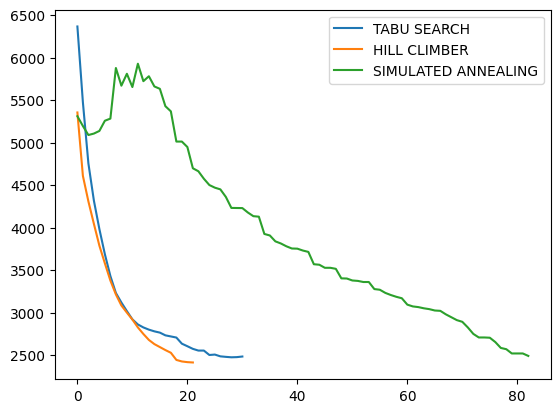

In [10]:
from matplotlib import pyplot as plt
plt.plot(t.history, label=t.NAME)
plt.plot(h.history, label=h.NAME)
plt.plot(s.history, label=s.NAME)
plt.legend()

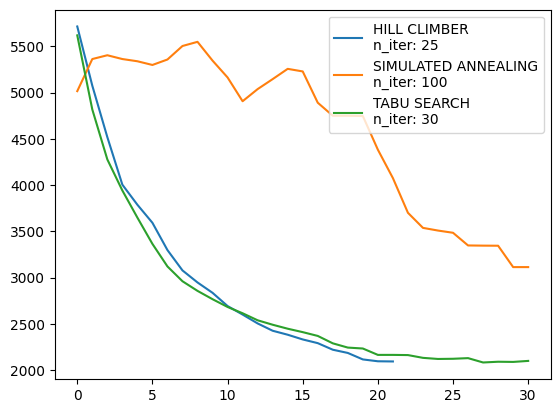

In [17]:
plt.plot(a.distance_history, label=a.algorithm)
plt.plot(b.distance_history, label=b.algorithm)
plt.plot(c.distance_history, label=c.algorithm)
plt.legend()